In [1]:
from light_curve_util import kepler_io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
KEPLER_DATA_DIR = "/home/idies/workspace/Storage/tdo/planets_ml/data/"
KEPLER_ID = 11442793  # Kepler-90.

In [3]:
#Read the light curve.
file_names = kepler_io.kepler_filenames(KEPLER_DATA_DIR, KEPLER_ID)
assert file_names, "Failed to find .fits files in {}".format(KEPLER_DATA_DIR)
all_time, all_flux = kepler_io.read_kepler_light_curve(file_names)
print("Read light curve with {} segments".format(len(all_time)))

Read light curve with 14 segments


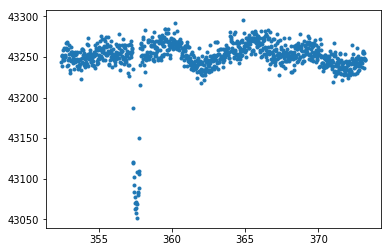

In [4]:
# Plot the fourth segment.
plt.plot(all_time[3], all_flux[3], ".")
plt.show()

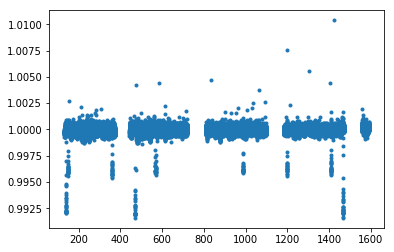

In [5]:
# Plot all light curve segments. We first divide by the median flux in each
# segment, because the segments are on different scales.
for f in all_flux:
    f /= np.median(f)
plt.plot(np.concatenate(all_time), np.concatenate(all_flux), ".")
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import tensorflow as tf

/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
KEPLER_ID = 11442793  # Kepler-90
TFRECORD_DIR = "/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/"

In [9]:
# Helper function to find the tf.Example corresponding to a particular TCE.
def find_tce(kepid, tce_plnt_num, filenames):
    for filename in filenames:
        for record in tf.python_io.tf_record_iterator(filename):
            ex = tf.train.Example.FromString(record)
            if (ex.features.feature["kepid"].int64_list.value[0] == kepid and
                ex.features.feature["tce_plnt_num"].int64_list.value[0] == tce_plnt_num):
                print("Found {}_{} in file {}".format(kepid, tce_plnt_num, filename))
                return ex
    raise ValueError("{}_{} not found in files: {}".format(kepid, tce_plnt_num, filenames))


In [10]:
# Find Kepler-90 g.
filenames = tf.gfile.Glob(os.path.join(TFRECORD_DIR, "*"))
assert filenames, "No files found in {}".format(TFRECORD_DIR)
ex = find_tce(KEPLER_ID, 1, filenames)

Found 11442793_1 in file /home/idies/workspace/Storage/tdo/planets_ml/tfrecord/train-00003-of-00008


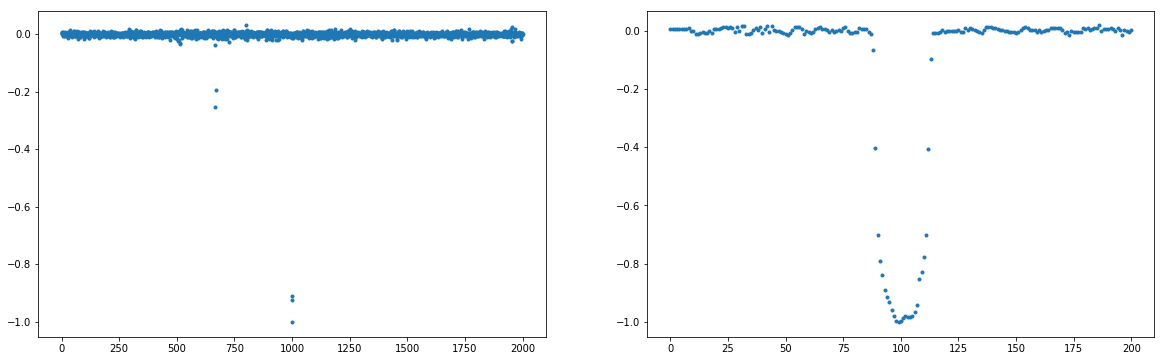

In [11]:
# Plot the global and local views.
global_view = np.array(ex.features.feature["global_view"].float_list.value)
local_view = np.array(ex.features.feature["local_view"].float_list.value)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(global_view, ".")
axes[1].plot(local_view, ".")
plt.show()

In [ ]:
!sh train.sh

/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:config: {
  "inputs": {
    "features": {
      "local_view": {
        "length": 201,
        "is_time_series": true
      },
      "global_view": {
        "length": 2001,
        "is_time_series": true
      }
    },
    "label_feature": "av_training_set",
    "label_map": {
      "PC": 1,
      "AFP": 0,
      "NTP": 0
    }
  },
  "hparams": {
    "output_dim": 1,
    "num_pre_logits_hidden_layers": 4,
    "pre_logits_hidden_layer_size": 512,
    "pre_logits_dropout_rate": 0.0,
    "batch_size": 64,
    "learning_rate": 1e-05,
    "learning_rate_decay_steps": 0,
    "learning_rate_decay_factor": 0,
    "learning_rate_decay_staircase": true,
    "optimizer"

INFO:tensorflow:Building input pipeline from 8 files matching patterns: ['/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/train*']
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-788
INFO:tensorflow:Saving checkpoints for 789 into ../../astronet_model/model.ckpt.
INFO:tensorflow:loss = 0.0776818, step = 789
INFO:tensorflow:global_step/sec: 1.07005
INFO:tensorflow:loss = 0.14089301, step = 889 (93.454 sec)
INFO:tensorflow:Saving checkpoints for 985 into ../../astronet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.14739959.
INFO:tensorflow:Starting evaluation on checkpoint ../../astronet_model/model.ckpt-985
INFO:tensorflow:Building input pipeline from 1 files matching patterns: ['/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/val*']
INFO:tensorflow:Starting evaluation at 2018-05-18-20:47:13
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-985
INFO:tensorflow:Finished ev

INFO:tensorflow:Starting evaluation at 2018-05-18-21:06:56
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-1970
INFO:tensorflow:Finished evaluation at 2018-05-18-21:07:06
INFO:tensorflow:Saving dict for global step 1970: accuracy/accuracy = 0.9396442, accuracy/num_correct = 1479.0, auc = 0.97890806, confusion_matrix/false_negatives = 29.0, confusion_matrix/false_positives = 66.0, confusion_matrix/true_negatives = 1153.0, confusion_matrix/true_positives = 326.0, global_step = 1970, loss = 0.152782, losses/weighted_cross_entropy = 0.15289794, num_examples = 1574.0
INFO:tensorflow:Starting training at global step 1970
INFO:tensorflow:Building input pipeline from 8 files matching patterns: ['/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/train*']
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-1970
INFO:tensorflow:Saving checkpoints for 1971 into ../../astronet_model/model.ckpt.
INFO:tens

INFO:tensorflow:Loss for final step: 0.12845694.
INFO:tensorflow:Starting evaluation on checkpoint ../../astronet_model/model.ckpt-4334
INFO:tensorflow:Building input pipeline from 1 files matching patterns: ['/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/val*']
INFO:tensorflow:Starting evaluation at 2018-05-18-21:54:57
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-4334
INFO:tensorflow:Finished evaluation at 2018-05-18-21:55:07
INFO:tensorflow:Saving dict for global step 4334: accuracy/accuracy = 0.9466328, accuracy/num_correct = 1490.0, auc = 0.9803605, confusion_matrix/false_negatives = 27.0, confusion_matrix/false_positives = 57.0, confusion_matrix/true_negatives = 1162.0, confusion_matrix/true_positives = 328.0, global_step = 4334, loss = 0.1446834, losses/weighted_cross_entropy = 0.14459695, num_examples = 1574.0
INFO:tensorflow:Starting training at global step 4334
INFO:tensorflow:Building input pipeline from 8 files matching patterns: ['/home/

INFO:tensorflow:Building input pipeline from 8 files matching patterns: ['/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/train*']
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-9850
INFO:tensorflow:Saving checkpoints for 9851 into ../../astronet_model/model.ckpt.
INFO:tensorflow:loss = 0.025997838, step = 9851
INFO:tensorflow:global_step/sec: 0.981158
INFO:tensorflow:loss = 0.08272707, step = 9951 (101.921 sec)
INFO:tensorflow:Saving checkpoints for 10000 into ../../astronet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.014636289.
INFO:tensorflow:Starting evaluation on checkpoint ../../astronet_model/model.ckpt-10000
INFO:tensorflow:Building input pipeline from 1 files matching patterns: ['/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/val*']
INFO:tensorflow:Starting evaluation at 2018-05-18-23:47:10
INFO:tensorflow:Restoring parameters from ../../astronet_model/model.ckpt-10000
INFO:tensorf

In [15]:
!sh evaluate_model.sh

/home/idies/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Using config: {'_model_dir': '/home/idies/workspace/Storage/ajshajib/persistent/astronet_model/checkpoints/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f65c2a1e048>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
